In [34]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import ne_chunk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tag import pos_tag
import string
import matplotlib.pyplot as plt
import spacy

raw = """Transformer is an exceptional innovation 
in the field of Deep Learning, contributed by Ashish Vaswani et al. (2017), Google.The transformer is the most influential Neural Network model that has shown outstanding performance on various NLP tasks including Machine Reading Comprehension, Machine translation and sentence classification. Attention mechanism and parallelization are the prominent features in the transformers. Consequently, it can facilitate long-range dependencies without any gradient vanishing or gradient explosion problems and it overcomes the drawbacks of the existing methods such as RNN and LSTM. The transformer is executed with an encoder-decoder mechanism and the original article of transformers # “Attention All You Need”."""

**What is tokenization?** We are basically converting the entire given text into "**parts**" or "**tokens**", based on a criteria, like words and sentences. There are multiple types of tokenizations and there are many different packages that perform tokenization or you can do it manually also.

For the given text, we have used *word_tokenize* and *sent_tokenize* which tokenize the given text into words and sentences.

As we can see in the output of the code block, the entire text has been converted to tokens, seperated from each other by quotes and commas.

In [35]:
# a. Tokenization
words = word_tokenize(raw)
sents = sent_tokenize(raw)
print("Word tokens:", words)
print("Sentence tokens:", sents)

Word tokens: ['Transformer', 'is', 'an', 'exceptional', 'innovation', 'in', 'the', 'field', 'of', 'Deep', 'Learning', ',', 'contributed', 'by', 'Ashish', 'Vaswani', 'et', 'al', '.', '(', '2017', ')', ',', 'Google.The', 'transformer', 'is', 'the', 'most', 'influential', 'Neural', 'Network', 'model', 'that', 'has', 'shown', 'outstanding', 'performance', 'on', 'various', 'NLP', 'tasks', 'including', 'Machine', 'Reading', 'Comprehension', ',', 'Machine', 'translation', 'and', 'sentence', 'classification', '.', 'Attention', 'mechanism', 'and', 'parallelization', 'are', 'the', 'prominent', 'features', 'in', 'the', 'transformers', '.', 'Consequently', ',', 'it', 'can', 'facilitate', 'long-range', 'dependencies', 'without', 'any', 'gradient', 'vanishing', 'or', 'gradient', 'explosion', 'problems', 'and', 'it', 'overcomes', 'the', 'drawbacks', 'of', 'the', 'existing', 'methods', 'such', 'as', 'RNN', 'and', 'LSTM', '.', 'The', 'transformer', 'is', 'executed', 'with', 'an', 'encoder-decoder', 'me

In [36]:
# b. Stopwords removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

print("Tokens after stopwords removal: ", filtered_words)

Tokens after stopwords removal:  ['Transformer', 'exceptional', 'innovation', 'field', 'Deep', 'Learning', ',', 'contributed', 'Ashish', 'Vaswani', 'et', 'al', '.', '(', '2017', ')', ',', 'Google.The', 'transformer', 'influential', 'Neural', 'Network', 'model', 'shown', 'outstanding', 'performance', 'various', 'NLP', 'tasks', 'including', 'Machine', 'Reading', 'Comprehension', ',', 'Machine', 'translation', 'sentence', 'classification', '.', 'Attention', 'mechanism', 'parallelization', 'prominent', 'features', 'transformers', '.', 'Consequently', ',', 'facilitate', 'long-range', 'dependencies', 'without', 'gradient', 'vanishing', 'gradient', 'explosion', 'problems', 'overcomes', 'drawbacks', 'existing', 'methods', 'RNN', 'LSTM', '.', 'transformer', 'executed', 'encoder-decoder', 'mechanism', 'original', 'article', 'transformers', '#', '“', 'Attention', 'Need', '”', '.']


In [37]:
# c. Punctuation removal
filtered_words = [word for word in filtered_words if word not in string.punctuation]
print("Text after punctuation removal: ", filtered_words)

Text after punctuation removal:  ['Transformer', 'exceptional', 'innovation', 'field', 'Deep', 'Learning', 'contributed', 'Ashish', 'Vaswani', 'et', 'al', '2017', 'Google.The', 'transformer', 'influential', 'Neural', 'Network', 'model', 'shown', 'outstanding', 'performance', 'various', 'NLP', 'tasks', 'including', 'Machine', 'Reading', 'Comprehension', 'Machine', 'translation', 'sentence', 'classification', 'Attention', 'mechanism', 'parallelization', 'prominent', 'features', 'transformers', 'Consequently', 'facilitate', 'long-range', 'dependencies', 'without', 'gradient', 'vanishing', 'gradient', 'explosion', 'problems', 'overcomes', 'drawbacks', 'existing', 'methods', 'RNN', 'LSTM', 'transformer', 'executed', 'encoder-decoder', 'mechanism', 'original', 'article', 'transformers', '“', 'Attention', 'Need', '”']


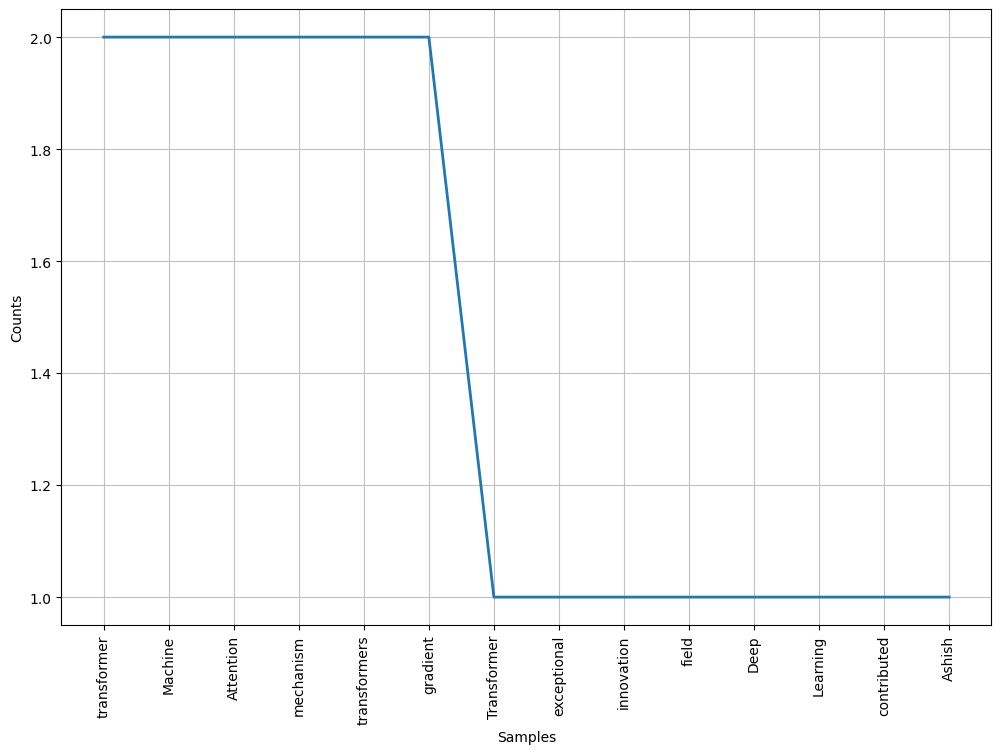

In [38]:
# Frequency distribution
dist = FreqDist(filtered_words)
# the number of samples in the plot functions can be changed based on what you want.
plt.figure(figsize=(12,8))
dist.plot(14, cumulative=False)
plt.show()

In [39]:
# stemming
porter = PorterStemmer()
lancaster = LancasterStemmer()
porter_stemmed_words = [porter.stem(word) for word in filtered_words]
lancaster_stemmed_words = [lancaster.stem(word) for word in filtered_words]
print("Porter Stemmed words: ", porter_stemmed_words)
print("Lancaster Stemmed words: ", lancaster_stemmed_words)

Porter Stemmed words:  ['transform', 'except', 'innov', 'field', 'deep', 'learn', 'contribut', 'ashish', 'vaswani', 'et', 'al', '2017', 'google.th', 'transform', 'influenti', 'neural', 'network', 'model', 'shown', 'outstand', 'perform', 'variou', 'nlp', 'task', 'includ', 'machin', 'read', 'comprehens', 'machin', 'translat', 'sentenc', 'classif', 'attent', 'mechan', 'parallel', 'promin', 'featur', 'transform', 'consequ', 'facilit', 'long-rang', 'depend', 'without', 'gradient', 'vanish', 'gradient', 'explos', 'problem', 'overcom', 'drawback', 'exist', 'method', 'rnn', 'lstm', 'transform', 'execut', 'encoder-decod', 'mechan', 'origin', 'articl', 'transform', '“', 'attent', 'need', '”']
Lancaster Stemmed words:  ['transform', 'exceiv', 'innov', 'field', 'deep', 'learn', 'contribut', 'ash', 'vaswan', 'et', 'al', '2017', 'google.th', 'transform', 'influ', 'neur', 'network', 'model', 'shown', 'outstand', 'perform', 'vary', 'nlp', 'task', 'includ', 'machin', 'read', 'comprehend', 'machin', 'tr

In [40]:
# lemmatization
lemmas = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
print("Lemmatized words: ", lemmas)

Lemmatized words:  ['Transformer', 'exceptional', 'innovation', 'field', 'Deep', 'Learning', 'contributed', 'Ashish', 'Vaswani', 'et', 'al', '2017', 'Google.The', 'transformer', 'influential', 'Neural', 'Network', 'model', 'shown', 'outstanding', 'performance', 'various', 'NLP', 'task', 'including', 'Machine', 'Reading', 'Comprehension', 'Machine', 'translation', 'sentence', 'classification', 'Attention', 'mechanism', 'parallelization', 'prominent', 'feature', 'transformer', 'Consequently', 'facilitate', 'long-range', 'dependency', 'without', 'gradient', 'vanishing', 'gradient', 'explosion', 'problem', 'overcomes', 'drawback', 'existing', 'method', 'RNN', 'LSTM', 'transformer', 'executed', 'encoder-decoder', 'mechanism', 'original', 'article', 'transformer', '“', 'Attention', 'Need', '”']


In [41]:
# POS tagging (parts-of-speech tagging)
tags = pos_tag(filtered_words)
print("POS Tagged words: ", tags)

POS Tagged words:  [('Transformer', 'NNP'), ('exceptional', 'JJ'), ('innovation', 'NN'), ('field', 'NN'), ('Deep', 'NNP'), ('Learning', 'NNP'), ('contributed', 'VBD'), ('Ashish', 'NNP'), ('Vaswani', 'NNP'), ('et', 'FW'), ('al', 'NN'), ('2017', 'CD'), ('Google.The', 'NNP'), ('transformer', 'NN'), ('influential', 'JJ'), ('Neural', 'NNP'), ('Network', 'NNP'), ('model', 'FW'), ('shown', 'VBN'), ('outstanding', 'JJ'), ('performance', 'NN'), ('various', 'JJ'), ('NLP', 'NNP'), ('tasks', 'NNS'), ('including', 'VBG'), ('Machine', 'NNP'), ('Reading', 'NNP'), ('Comprehension', 'NNP'), ('Machine', 'NNP'), ('translation', 'NN'), ('sentence', 'NN'), ('classification', 'NN'), ('Attention', 'NNP'), ('mechanism', 'NN'), ('parallelization', 'NN'), ('prominent', 'NN'), ('features', 'VBZ'), ('transformers', 'NNS'), ('Consequently', 'RB'), ('facilitate', 'VBP'), ('long-range', 'JJ'), ('dependencies', 'NNS'), ('without', 'IN'), ('gradient', 'NN'), ('vanishing', 'VBG'), ('gradient', 'JJ'), ('explosion', 'NN'

In [ ]:
# Named-entity recognition
# nlp = spacy.load("en_core_web_sm")
# doc = nlp(raw)
# entities = [(ent.text, ent.label_) for ent in doc.ents]
# print("Named entities: ", entities)

In [43]:
# Named entity recognition
entities = ne_chunk(tags)
print("Named Entities: ", entities)

Named Entities:  (S
  (GPE Transformer/NNP)
  exceptional/JJ
  innovation/NN
  field/NN
  (PERSON Deep/NNP Learning/NNP)
  contributed/VBD
  (PERSON Ashish/NNP Vaswani/NNP)
  et/FW
  al/NN
  2017/CD
  Google.The/NNP
  transformer/NN
  influential/JJ
  (ORGANIZATION Neural/NNP Network/NNP)
  model/FW
  shown/VBN
  outstanding/JJ
  performance/NN
  various/JJ
  (ORGANIZATION NLP/NNP)
  tasks/NNS
  including/VBG
  (PERSON Machine/NNP Reading/NNP)
  Comprehension/NNP
  Machine/NNP
  translation/NN
  sentence/NN
  classification/NN
  Attention/NNP
  mechanism/NN
  parallelization/NN
  prominent/NN
  features/VBZ
  transformers/NNS
  Consequently/RB
  facilitate/VBP
  long-range/JJ
  dependencies/NNS
  without/IN
  gradient/NN
  vanishing/VBG
  gradient/JJ
  explosion/NN
  problems/NNS
  overcomes/VBZ
  drawbacks/NNS
  existing/VBG
  methods/NNS
  (ORGANIZATION RNN/NNP)
  LSTM/NNP
  transformer/NN
  executed/VBD
  encoder-decoder/JJ
  mechanism/NN
  original/JJ
  article/NN
  transformers/NN

In [53]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re

In [54]:
# Define the input text
text = "Mickey Mouse, a cheerful and optimistic mouse clad in red shorts and yellow shoes, is the iconic mascot of The Walt Disney Company. Debuting in 1928, this spunky character has charmed audiences for generations with his adventures and can-do attitude."

# Preprocess the text: convert to lowercase, tokenize and remove punctuations
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)
sentences = [sentence.split() for sentence in text.split('.')]

In [55]:
# train the model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Visualize the vectors
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Reduce dimensions for visualization (using PCA)
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

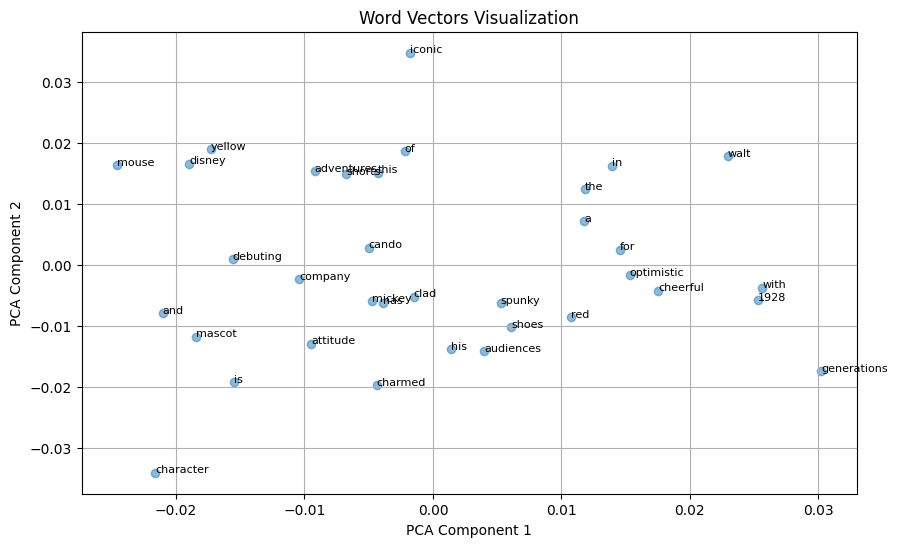

In [56]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]), fontsize=8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Word Vectors Visualization')
plt.grid(True)
plt.show()

Word2Vec is a technique for generating word embeddings, which are dense vector representations of words in a continuous vector space. The fundamental idea behind Word2Vec is to learn distributed representations of words based on the context in which they appear. The model operates on the assumption that words appearing in similar contexts tend to have similar meanings. Word2Vec accomplishes this by training a neural network to predict a target word given its surrounding context words (skip-gram model) or predict surrounding context words given a target word (continuous bag of words, CBOW model). During training, the model adjusts the word embeddings to maximize the likelihood of correctly predicting context words or target words. As a result, words with similar meanings or contexts end up having similar vector representations in the embedding space, enabling capturing of semantic relationships between words.

Once trained, the Word2Vec model produces high-dimensional vectors for each word in the vocabulary, where the dimensions correspond to the features learned during training. These vectors effectively capture the semantic and syntactic information of the words, enabling various downstream natural language processing tasks such as sentiment analysis, document classification, and machine translation. One of the key advantages of Word2Vec embeddings is their ability to capture semantic relationships between words through vector arithmetic operations. For example, by subtracting the vector for "king" from "queen" and adding the vector for "woman," we obtain a vector close to that of "man." This property allows for tasks like word analogy completion, where one can find words that are similar to a given word in a certain context. Overall, Word2Vec embeddings provide a powerful and efficient way to represent words in a dense vector space, facilitating numerous NLP applications.

Sure, let's break down the code step by step:

1. **Import Libraries**: We import necessary libraries such as `Word2Vec` from `gensim.models` for training the Word2Vec model, `PCA` from `sklearn.decomposition` for dimensionality reduction, and `matplotlib.pyplot` for visualization.

2. **Define the Input Text**: The input text is defined as a string containing the text we want to analyze.

3. **Preprocessing the Text**: Before training the Word2Vec model, we preprocess the text by converting it to lowercase to ensure consistency in word representation. We then use regular expressions (`re.sub()`) to remove punctuation from the text.

4. **Tokenization**: We split the preprocessed text into sentences and tokenize each sentence into words. The result is a list of sentences, where each sentence is represented as a list of words.

5. **Training the Word2Vec Model**: We initialize a Word2Vec model with parameters like `vector_size` (dimensionality of the word vectors), `window` (maximum distance between the current and predicted word within a sentence), `min_count` (minimum frequency count of words to consider), and `sg` (training algorithm, 0 for CBOW, 1 for skip-gram). We then train the model on the tokenized sentences.

6. **Visualizing the Word Vectors**: We retrieve the list of words and their corresponding vectors from the trained model. We use PCA (Principal Component Analysis) from scikit-learn to reduce the dimensions of the word vectors to 2D for visualization purposes. Each word is represented by a point in the plot, with its position determined by its PCA-transformed vector representation.

7. **Plotting**: We plot the word vectors in a 2D plane using `matplotlib.pyplot.scatter()`. Each point in the plot corresponds to a word, and its position reflects its relationship with other words based on the context in which they appear in the text.

Overall, the code demonstrates how to preprocess text, train a Word2Vec model, and visualize the resulting word vectors in a 2D space, providing insights into the semantic relationships between words in the input text.